# Task
Perform linear regression on the dataset at "https://raw.githubusercontent.com/plotly/datasets/master/gapminderDataFiveYear.csv" step by step on different cells.

## Load the dataset

### Subtask:
Load the dataset from the provided URL into a pandas DataFrame.


**Reasoning**:
Import the pandas library, load the dataset from the URL into a pandas DataFrame, and display the first 5 rows to verify the loading.



In [1]:
import pandas as pd

df = pd.read_csv("https://raw.githubusercontent.com/plotly/datasets/master/gapminderDataFiveYear.csv")
display(df.head())

,country,year,pop,continent,lifeExp,gdpPercap
0,Afghanistan,1952,8425333.0,Asia,28.801,779.445314
1,Afghanistan,1957,9240934.0,Asia,30.332,820.853030
2,Afghanistan,1962,10267083.0,Asia,31.997,853.100710
3,Afghanistan,1967,11537966.0,Asia,34.020,836.197138
4,Afghanistan,1972,13079460.0,Asia,36.088,739.981106


## Explore the data

### Subtask:
Display the first few rows, check the data types, and look for missing values.


**Reasoning**:
Display the first few rows, check the data types, and look for missing values as requested in the instructions.



In [2]:
display(df.head())
df.info()
display(df.isnull().sum())

,country,year,pop,continent,lifeExp,gdpPercap
0,Afghanistan,1952,8425333.0,Asia,28.801,779.445314
1,Afghanistan,1957,9240934.0,Asia,30.332,820.853030
2,Afghanistan,1962,10267083.0,Asia,31.997,853.100710
3,Afghanistan,1967,11537966.0,Asia,34.020,836.197138
4,Afghanistan,1972,13079460.0,Asia,36.088,739.981106


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1704 entries, 0 to 1703
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   country    1704 non-null   object 
 1   year       1704 non-null   int64  
 2   pop        1704 non-null   float64
 3   continent  1704 non-null   object 
 4   lifeExp    1704 non-null   float64
 5   gdpPercap  1704 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 80.0+ KB


,0
country,0
year,0
pop,0
continent,0
lifeExp,0
gdpPercap,0


## Prepare the data

### Subtask:
Select the features (independent variables) and the target variable (dependent variable) for the linear regression model.


**Reasoning**:
Select the 'lifeExp' column as the target variable and 'year' and 'gdpPercap' as features for the linear regression model based on common data analysis practices with this dataset.



In [3]:
target = df['lifeExp']
features = df[['year', 'gdpPercap']]

**Reasoning**:
Display the first few rows of the features and target variables to verify the selection.



In [4]:
display(features.head())
display(target.head())

,year,gdpPercap
0,1952,779.445314
1,1957,820.853030
2,1962,853.100710
3,1967,836.197138
4,1972,739.981106


,lifeExp
0,28.801
1,30.332
2,31.997
3,34.020
4,36.088


## Split the data

### Subtask:
Split the dataset into training and testing sets.


**Reasoning**:
Split the data into training and testing sets and print their shapes.



In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (1363, 2)
Shape of X_test: (341, 2)
Shape of y_train: (1363,)
Shape of y_test: (341,)


## Train the linear regression model

### Subtask:
Train a linear regression model using the training data.


**Reasoning**:
Train a linear regression model using the training data.



In [6]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

## Evaluate the model

### Subtask:
Evaluate the performance of the trained model on the testing data using appropriate metrics.


**Reasoning**:
Evaluate the performance of the trained model on the testing data using appropriate metrics.



In [7]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2) Score: {r2}")

Mean Squared Error (MSE): 77.78633093549001
R-squared (R2) Score: 0.49116623673899007


## Visualize the results

### Subtask:
Visualize the regression line and the data points.


**Reasoning**:
Visualize the regression line and the data points using matplotlib.



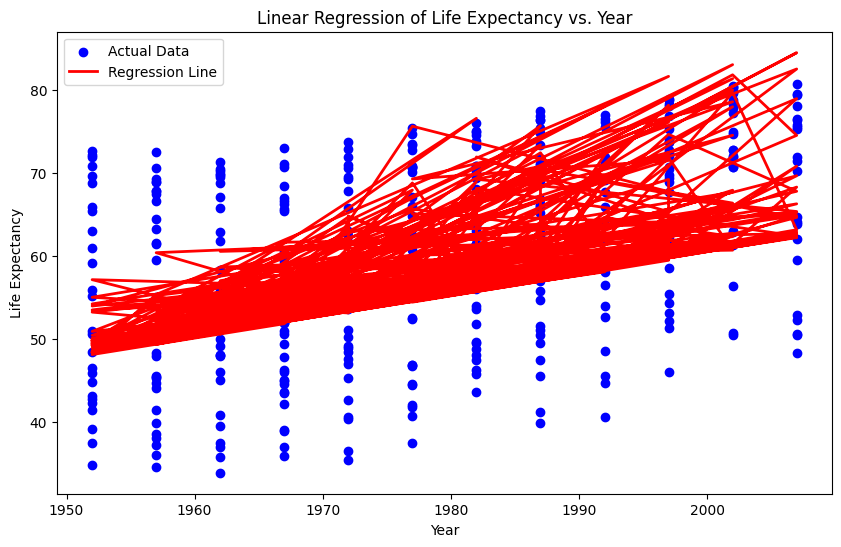

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(X_test['year'], y_test, color='blue', label='Actual Data')
plt.plot(X_test['year'], y_pred, color='red', linewidth=2, label='Regression Line')
plt.xlabel('Year')
plt.ylabel('Life Expectancy')
plt.title('Linear Regression of Life Expectancy vs. Year')
plt.legend()
plt.show()

## Summary:

### Data Analysis Key Findings

*   The dataset contains 1704 entries and 6 columns: `country`, `year`, `pop`, `continent`, `lifeExp`, and `gdpPercap`.
*   There are no missing values in the dataset.
*   The dataset was successfully split into training (80%) and testing (20%) sets, resulting in 1363 rows for training and 341 rows for testing.
*   The trained linear regression model achieved a Mean Squared Error (MSE) of approximately 77.79 on the test set.
*   The R-squared score of the model on the test set is approximately 0.49, indicating that about 49% of the variance in life expectancy can be explained by the 'year' and 'gdpPercap' features in this model.

### Insights or Next Steps

*   The current linear model, using only 'year' and 'gdpPercap', explains less than half of the variance in life expectancy.
*   Consider exploring the impact of other features like 'continent' and 'pop', or interactions between features, to potentially improve the model's performance and better explain the variations in life expectancy.
